# Performance evaluation

Here, we use the diabetes dataset to illustrate the model performance evaluation.

## Import Libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 
             'bmi', 'pedigree', 'age', 'diabetes']

# load dataset
github_path = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_path + 'main/w10-classification/'

# dat_dir = './'

pima = pd.read_csv(dat_dir + "diabetes.csv", skiprows=1, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

## Selecting Feature and splitting data

For Features considering all the columns except label, as it is our Target.

In [5]:
feature_cols = ['pregnant', 'glucose', 'bp','skin', 
                'insulin', 'bmi', 'pedigree','age']

X = pima[feature_cols] # Features
y = pima.diabetes      # Target variable

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [7]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(576, 8)

(576,)

(192, 8)

(192,)

## Train the Model: a first try with all the variables

Here, we use `sklearn` as for its wide utility functions. More details on logistic regression: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [8]:
# in sklearn, it will add intercept by default

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [9]:
# same fitted model parameters as statsmodels

clf.coef_, clf.intercept_

(array([[ 0.08624284,  0.03312557, -0.01117705,  0.00605276, -0.00100726,
          0.08798077,  0.80017332,  0.02223042]]),
 array([-8.37875824]))

In [10]:
# prediction on test set

P_hat_prob = clf.predict_proba(X_test)[:, 1]
y_pred = (P_hat_prob >= 0.5).astype(int)

### Model Evaluation 

In [11]:
# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                         colnames=['Predicted'])
cnf_matrix

Predicted,0,1
Actual,,
0,117,13
1,26,36


In [12]:
# think how accuracy is defined
# we can use (TN + TP) / (TN + TP + FN + FP)
# we can also directly compare the proportion of correctness
# we can also use metrics.accuracy_score

# accuracyScore = metrics.accuracy_score(y_test, y_pred)

print('Accuracy: %.4f' %(np.mean(y_test == y_pred)))

Accuracy: 0.7969


### ROC curve and AUC

In [13]:
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, P_hat_prob)
roc_auc = metrics.roc_auc_score(y_test, P_hat_prob)

In [14]:
roc_auc

0.8593052109181142

In [15]:
_query_threshold1 = 0.2
idx1 = np.argmin(np.abs(thresholds - _query_threshold1))
_fpr1, _tpr1, _threshold1 = fpr[idx1], tpr[idx1], thresholds[idx1]

_query_threshold2 = 0.5
idx2 = np.argmin(np.abs(thresholds - _query_threshold2))
_fpr2, _tpr2, _threshold2 = fpr[idx2], tpr[idx2], thresholds[idx2]

_query_threshold3 = 0.7
idx3 = np.argmin(np.abs(thresholds - _query_threshold3))
_fpr3, _tpr3, _threshold3 = fpr[idx3], tpr[idx3], thresholds[idx3]

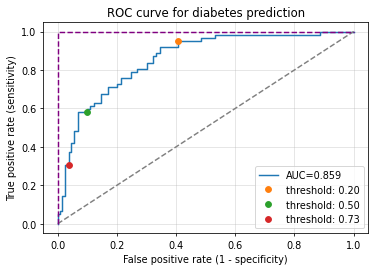

In [16]:
fig = plt.figure(dpi=70)
plt.plot(fpr, tpr, label='AUC=%.3f' %(roc_auc))

plt.plot(_fpr1, _tpr1, 'o', label='threshold: %.2f' %(_threshold1))
plt.plot(_fpr2, _tpr2, 'o', label='threshold: %.2f' %(_threshold2))
plt.plot(_fpr3, _tpr3, 'o', label='threshold: %.2f' %(_threshold3))

plt.plot([0, 1], [0, 1], '--', color='grey')
plt.plot([0, 0, 1], [0, 1, 1], '--', color='purple')

plt.grid(alpha=0.4)

plt.xlabel("False positive rate (1 - specificity)")
plt.ylabel("True positive rate (sensitivity)")
plt.title("ROC curve for diabetes prediction")
plt.legend()
plt.show()

## Cross-validation

Sklearn has very handy build-in functions, e.g., `cross_val_predict`. More intro on cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html 

In [17]:
feature_cols = ['pregnant', 'glucose', 'bp','skin', 
                'insulin', 'bmi', 'pedigree','age']

X = pima[feature_cols] # Features
y = pima.diabetes      # Target variable

In [18]:
from sklearn.model_selection import cross_val_predict

clf = LogisticRegression(max_iter=300)

y_pred_proba_cv = cross_val_predict(clf, X, y, cv=5, method='predict_proba')
P_hat_prob_cv = y_pred_proba_cv[:, 1]

In [19]:
fpr_cv, tpr_cv, thresholds_cv = metrics.roc_curve(y, P_hat_prob_cv)
roc_auc_cv = metrics.roc_auc_score(y, P_hat_prob_cv)

In [20]:
roc_auc_cv

0.8309253731343282

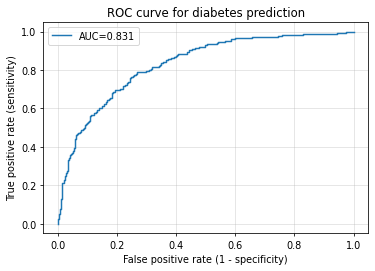

In [21]:
fig = plt.figure(dpi=70)
plt.plot(fpr_cv, tpr_cv, label='AUC=%.3f' %(roc_auc_cv))
plt.grid(alpha=0.4)
plt.xlabel("False positive rate (1 - specificity)")
plt.ylabel("True positive rate (sensitivity)")
plt.title("ROC curve for diabetes prediction")
plt.legend()
plt.show()

## Naive Bayes

sklearn also Naive Bayes classifer with supporting a few models for estimating the single-dimensional density. More details: https://scikit-learn.org/stable/modules/naive_bayes.html

In [22]:
# feature_cols = ['pregnant', 'glucose', 'bp','skin', 
#                 'insulin', 'bmi', 'pedigree','age']

feature_cols = ['pregnant', 'glucose', 'bp', 'bmi', 'pedigree','age']

X = pima[feature_cols] # Features
y = pima.diabetes      # Target variable

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict

clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

In [25]:
clf_NB.theta_

array([[  3.35135135, 110.34864865,  68.48918919,  30.38702703,
          0.42684595,  31.39459459],
       [  4.7184466 , 140.56796117,  71.83009709,  35.48106796,
          0.54343689,  37.51456311]])

In [26]:
clf_NB.sigma_

array([[9.33060729e+00, 6.45967634e+02, 3.41201235e+02, 6.14519949e+01,
        9.13004741e-02, 1.42017269e+02],
       [1.47945151e+01, 1.05840072e+03, 3.88908027e+02, 4.98337688e+01,
        1.35675395e-01, 1.23026488e+02]])

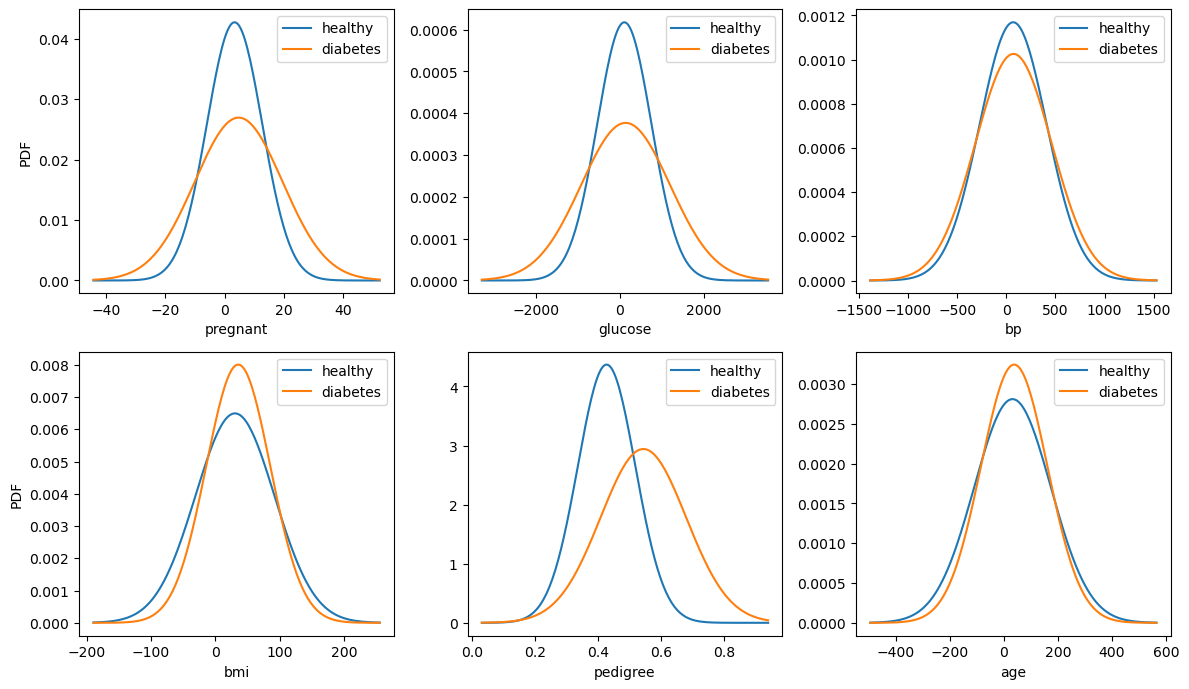

In [27]:
from scipy import stats

fig = plt.figure(figsize=(12, 7), dpi=100)
for i in range(6):
    plt.subplot(2, 3, i+1)
    _mu0 = clf_NB.theta_[0, i]
    _mu1 = clf_NB.theta_[1, i]
    _sigma0 = clf_NB.sigma_[0, i]
    _sigma1 = clf_NB.sigma_[1, i]
    
    _x_min = (_mu0 + _mu1) / 2 - 4 * (_sigma0 + _sigma1) / 2
    _x_max = (_mu0 + _mu1) / 2 + 4 * (_sigma0 + _sigma1) / 2
    _xx = np.linspace(_x_min, _x_max, 200)
    
    _pdf0 = stats.norm.pdf(_xx, _mu0, _sigma0)
    _pdf1 = stats.norm.pdf(_xx, _mu1, _sigma1)
    plt.plot(_xx, _pdf0, label='healthy')
    plt.plot(_xx, _pdf1, label='diabetes')
    plt.legend()
    plt.xlabel(feature_cols[i])
    if i == 0 or i == 3:
        plt.ylabel('PDF')
    
plt.tight_layout()
plt.show()

### Evaluate Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict

clf_NB = GaussianNB()

y_pred_proba_NB = cross_val_predict(clf_NB, X, y, cv=5, method='predict_proba')
P_hat_prob_NB = y_pred_proba_NB[:, 1]

In [29]:
fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve(y, P_hat_prob_NB)
roc_auc_NB = metrics.roc_auc_score(y, P_hat_prob_NB)

In [30]:
roc_auc_NB

0.8254328358208955

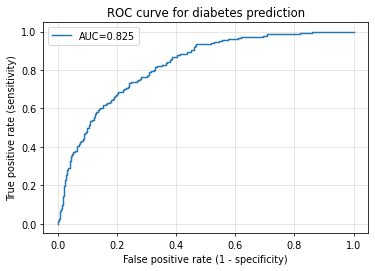

In [31]:
fig = plt.figure(dpi=70)
plt.plot(fpr_NB, tpr_NB, label='AUC=%.3f' %(roc_auc_NB))
plt.grid(alpha=0.4)
plt.xlabel("False positive rate (1 - specificity)")
plt.ylabel("True positive rate (sensitivity)")
plt.title("ROC curve for diabetes prediction")
plt.legend()
plt.show()